# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv('./UCI HAR Dataset/output/X_train.csv', index_col=0)
X_test = pd.read_csv('./UCI HAR Dataset/output/X_test.csv', index_col=0)
y_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=24601)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [4]:
clf = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train, y_train)

# Acessando o atributo feature_importances_
importancias = clf.feature_importances_

# Criando um DataFrame com valores de importância
df_importancias = pd.DataFrame({'Importância': importancias})

# Filtrando apenas pelos 3 maiores valores
df_importancias = (df_importancias
                   .sort_values(by='Importância', ascending=False)
                   .head(3))

df_importancias

,Importância
53,0.280438
390,0.253532
560,0.167548


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [5]:
# Usando apenas as melhores colunas
X_train2 = X_train.iloc[:, [53, 390, 560]]
X_test2 = X_test.iloc[:, [53, 390, 560]]
X_valid2 = X_valid.iloc[:, [53, 390, 560]]

In [6]:
X_valid2

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)"
5987,0.983323,-0.752487,0.188462
2178,0.974067,-0.568894,0.214522
3541,0.942067,-0.760945,0.283562
1015,0.955844,-0.999947,0.279683
6119,0.980804,-0.999845,0.020513
...,...,...,...
5775,-0.547031,-0.999953,-0.582900
3196,0.928819,-0.409379,0.023917
370,0.944427,-0.999891,0.305707
4521,0.901039,-0.494707,0.202747


In [7]:
X_train2

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)"
3288,0.982597,-0.999992,0.039513
3987,0.924770,-0.999944,0.297958
2345,0.835351,-0.591040,0.269076
972,0.933406,-0.645622,0.305458
7081,0.980266,-0.857830,0.198996
...,...,...,...
1232,-0.432282,-0.999815,-0.948139
5307,0.985853,-0.999974,0.202276
4216,0.889222,-0.999926,0.335103
5330,0.988524,-0.999972,0.033881


In [8]:
X_test2

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)"
0,0.944461,-0.998040,0.276801
1,0.944461,-0.999641,0.281343
2,0.948704,-0.999954,0.280083
3,0.947309,-0.999949,0.284114
4,0.946221,-0.999955,0.290722
...,...,...,...
2942,0.903413,-0.792017,0.274627
2943,0.903793,-0.807522,0.273578
2944,0.903793,-0.830224,0.274479
2945,0.909007,-0.838522,0.264782


In [9]:
# Criando o valor de aplhas
caminho = DecisionTreeClassifier(random_state=24601).cost_complexity_pruning_path(X_train2, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

# Montando uma árvore pra cada um usando TRAIN
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=24601, ccp_alpha=ccp_alpha).fit(X_train2, y_train)
    clfs.append(clf)

# Calculando melhor score usando VALID
valid_scores = [clf.score(X_valid2, y_valid) for clf in clfs]

# Descobrindo qual é a melhor árvore
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'O melhor ccp_alpha é: {ccp_alphas[valid_scores.index(max(valid_scores))]}')
print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

O melhor ccp_alpha é: 0.00022971829283037124
Acurácia da melhor árvore na base de validação: 90.04


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia do teste: 68.71


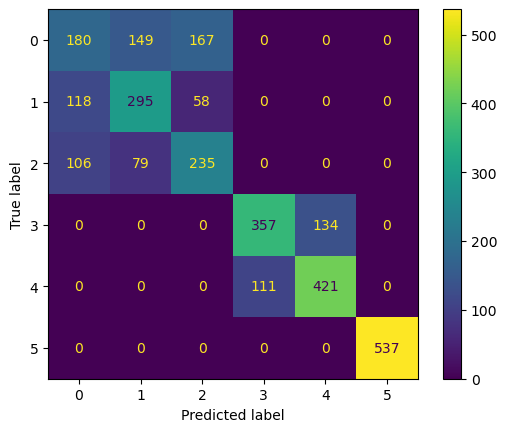

In [10]:
acuracia_teste = melhor_arvore.score(X_test2, y_test)
print(f'Acurácia do teste: {acuracia_teste*100:.2f}')


y_pred = melhor_arvore.predict(X_test2)
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
matrix.plot()